# Support Vector Regression

#### Import Default Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Data Preparation

In [2]:
dataset = pd.read_csv('amd_daily.csv')    # Feel free to use your own dataset to experiment.
#dataset


In [3]:
# Add Day as index column to serve as independent variable
dataset['Day'] = range(1,len(dataset['Close'])+1)

In [4]:
# Extracting independent (X) and dependent (y) columns/fields/variables. You can experiment with different independent variables.
X_raw = dataset.iloc[:,7:].values        # Independent variables ('Date')
y_raw = dataset.iloc[:,4:5].values       # Dependent variable ('close')
# Reference for iloc: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html

**Note:** This time we won't split the dataset into training and test set as we want to utilize whole dataset to train the model.

#### Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X_raw)
y = sc_y.fit_transform(y_raw)
# We scale both X & y to implement SVR because the difference between both variables is big enough to create an imbalance of impact on the mathematical formula.
# For eg. In the equation if value of one variable is 5 and other variable is 500.
            # So in such a case, we need to scale both variables in such a way that they get mapped on to same range or range close to each other.

print(X)    # Uncomment these to see how the variables changed after scaling compared to the original values.
print(y)

[[-1.72519117]
 [-1.71144463]
 [-1.69769809]
 [-1.68395154]
 [-1.670205  ]
 [-1.65645846]
 [-1.64271191]
 [-1.62896537]
 [-1.61521883]
 [-1.60147228]
 [-1.58772574]
 [-1.5739792 ]
 [-1.56023265]
 [-1.54648611]
 [-1.53273957]
 [-1.51899303]
 [-1.50524648]
 [-1.49149994]
 [-1.4777534 ]
 [-1.46400685]
 [-1.45026031]
 [-1.43651377]
 [-1.42276722]
 [-1.40902068]
 [-1.39527414]
 [-1.38152759]
 [-1.36778105]
 [-1.35403451]
 [-1.34028796]
 [-1.32654142]
 [-1.31279488]
 [-1.29904833]
 [-1.28530179]
 [-1.27155525]
 [-1.2578087 ]
 [-1.24406216]
 [-1.23031562]
 [-1.21656907]
 [-1.20282253]
 [-1.18907599]
 [-1.17532944]
 [-1.1615829 ]
 [-1.14783636]
 [-1.13408982]
 [-1.12034327]
 [-1.10659673]
 [-1.09285019]
 [-1.07910364]
 [-1.0653571 ]
 [-1.05161056]
 [-1.03786401]
 [-1.02411747]
 [-1.01037093]
 [-0.99662438]
 [-0.98287784]
 [-0.9691313 ]
 [-0.95538475]
 [-0.94163821]
 [-0.92789167]
 [-0.91414512]
 [-0.90039858]
 [-0.88665204]
 [-0.87290549]
 [-0.85915895]
 [-0.84541241]
 [-0.83166586]
 [-0.81791

#### Train the model

In [7]:
from sklearn.svm import SVR

In [8]:
regressor = SVR(kernel='rbf')       # Define regressor as SVR instance, but this time with parameter 'kernel' as 'rbf'.
                                    # RBF is one of many techniques called kernel specialized for SVR and SVMs (Support Vector Machines).
regressor.fit(X,y)      # Train the SVR model on the dependent and independent variables/data.

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

#### Predicting Results

In [10]:
input = [[165]]
input_scaled = sc_X.transform([[165]])      # To predict, we will also have to scale the input as the model is trained on scaled data.
result = regressor.predict(input_scaled)    # Then we get the predicted value, which comes out as already scaled as model trains with scaled target variable. 
result_inversed = sc_y.inverse_transform(result.reshape(1,-1))      # To get actual value, we need to inverse the scaling/transformation.
print(result_inversed)      # Now you have the actual result value.

# To understand the whole flow, check the following:
# Input > Transformation/Scaling > MODEL > Inverse transformation > Actual Result

[[117.73795425]]


#### If you were able to run till here successfully, then machine learning part is complete. Let's visualize the model.

#### Visualization

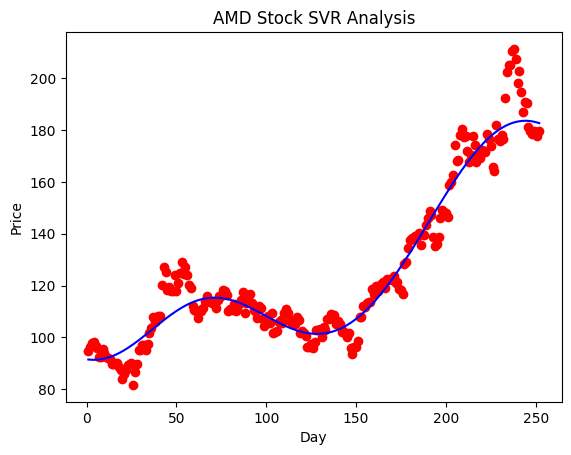

In [11]:
plt.scatter(X_raw,y_raw, color="red")
plt.plot(X_raw, sc_y.inverse_transform(regressor.predict(X).reshape(1, -1))[0], color="blue")
# !Got the following error in the previous line: x and y must have same first dimension, but have shapes (252, 1) and (1, 252)
# So from the error, we can identify that the we need same shape for both X & y. So I reshaped the X.
plt.title("AMD Stock SVR Analysis")
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()